In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #se importa libreria para graficos

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

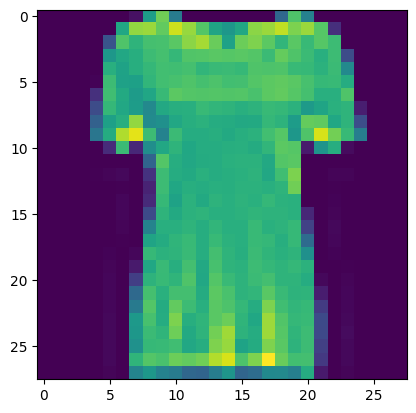

In [7]:
plt.imshow(x_train[10])

In [8]:
y_train[10]

0

In [9]:
#scale data
x_train_scaled=x_train/255
x_test_scaled=x_test/255

**a) Desing model architecture**

In [10]:
#DNN model
model=keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(units=3024,activation="relu"),
  keras.layers.Dropout(.1),
  keras.layers.Dense(units=1064,activation="relu"),
  keras.layers.Dropout(.1),
  keras.layers.Dense(units=512,activation="relu"),
  keras.layers.Dropout(.1),
  keras.layers.Dense(units=255,activation="relu"),
  keras.layers.Dense(units=164,activation="relu"),
  keras.layers.Dense(units=10,activation="softmax"),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 3024)              2373840   
                                                                 
 dropout (Dropout)           (None, 3024)              0         
                                                                 
 dense_1 (Dense)             (None, 1064)              3218600   
                                                                 
 dropout_1 (Dropout)         (None, 1064)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               545280    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0

**b) Define the methods for weight and bias value updation (optimization techniques, error method, evaluation metrics)**

In [12]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
    )

**c) Pass data for training text**

In [13]:
model.fit(x_train_scaled, y_train,epochs=12, validation_data=(x_test_scaled,y_test))

Epoch 1/12
1875/1875 [==============================] - 14s 5ms/step - loss: 0.5407 - accuracy: 0.8041 - val_loss: 0.4515 - val_accuracy: 0.8400
Epoch 2/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4113 - accuracy: 0.8533 - val_loss: 0.4095 - val_accuracy: 0.8562
Epoch 3/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3724 - accuracy: 0.8671 - val_loss: 0.3668 - val_accuracy: 0.8709
Epoch 4/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3497 - accuracy: 0.8737 - val_loss: 0.3946 - val_accuracy: 0.8554
Epoch 5/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3289 - accuracy: 0.8825 - val_loss: 0.3566 - val_accuracy: 0.8735
Epoch 6/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3168 - accuracy: 0.8858 - val_loss: 0.3510 - val_accuracy: 0.8767
Epoch 7/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3072 - accuracy: 0.8895 - val_loss: 0.3533 - val_accu

**Convolution Model**

In [19]:
model_1=keras.Sequential([
    keras.layers.Conv2D(
        filters=618,
        kernel_size=(3,3),
        padding="valid",
        activation="relu",
        input_shape=(28,28,1)
        ),
    keras.layers.MaxPooling2D(
        padding="valid"
    ),
    keras.layers.Conv2D(
        filters=512,
        kernel_size=(3,3),
        padding="valid",
        activation="relu"
    ),
    keras.layers.MaxPooling2D(
        padding="valid"
    ),
    keras.layers.Conv2D(
        filters=112,
        kernel_size=(3,3),
        padding="valid",
        activation="relu"
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(units=1024,activation="relu"),
    keras.layers.Dropout(.2),
    keras.layers.Dense(units=512,activation="relu"),
    keras.layers.Dense(units=10,activation="softmax")
])

In [20]:
model_1.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [21]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 618)       6180      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 618)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 512)       2848256   
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 512)         0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 112)         516208    
                                                                 
 flatten_3 (Flatten)         (None, 1008)             

In [22]:
model_1.fit(x_train_scaled,y_train,epochs=12,validation_data=(x_test_scaled,y_test))

Epoch 1/12
1875/1875 [==============================] - 39s 20ms/step - loss: 0.4415 - accuracy: 0.8359 - val_loss: 0.3503 - val_accuracy: 0.8725
Epoch 2/12
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2970 - accuracy: 0.8913 - val_loss: 0.3087 - val_accuracy: 0.8892
Epoch 3/12
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2536 - accuracy: 0.9071 - val_loss: 0.2888 - val_accuracy: 0.8962
Epoch 4/12
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2239 - accuracy: 0.9165 - val_loss: 0.2760 - val_accuracy: 0.9041
Epoch 5/12
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1989 - accuracy: 0.9247 - val_loss: 0.2778 - val_accuracy: 0.9054
Epoch 6/12
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1823 - accuracy: 0.9303 - val_loss: 0.2923 - val_accuracy: 0.9034
Epoch 7/12
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1624 - accuracy: 0.9387 - val_loss: 0.3069 -

In [23]:
dir(model_1)

['_SCALAR_UPRANKING_ON',
 '_TF_MODULE_IGNORED_PROPERTIES',
 '__annotations__',
 '__call__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_aggregate_exact_metrics',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_get_config',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_autotune_steps_per_execution',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_spec',
 '_callable_losses',
 '_captured_weight_regularizer

In [24]:
model_1.layers

In [25]:
layers=[layer for layer in model_1.layers]

In [28]:
layers[-1].weights

[<tf.Variable 'dense_14/kernel:0' shape=(512, 10) dtype=float32, numpy=
 array([[-0.13475811, -0.4196458 , -0.04130524, ..., -0.14621286,
          0.02530944,  0.04383738],
        [-0.1079462 , -0.27717125, -0.25427556, ...,  0.01556143,
         -0.12285725, -0.0048193 ],
        [ 0.0551242 ,  0.00952705, -0.2252049 , ..., -0.0078197 ,
          0.0008589 ,  0.02037843],
        ...,
        [-0.03357908, -0.09011319, -0.1818149 , ..., -0.25448895,
          0.04832946, -0.167713  ],
        [-0.07452906,  0.07592396, -0.29592517, ...,  0.04312363,
          0.05303866, -0.01506145],
        [-0.03767193,  0.06501744, -0.08443002, ..., -0.23039094,
          0.09015395, -0.24100426]], dtype=float32)>,
 <tf.Variable 'dense_14/bias:0' shape=(10,) dtype=float32, numpy=
 array([-0.08847976, -0.3493367 , -0.0308109 ,  0.21045563, -0.11365395,
        -0.05323304,  0.13617863,  0.13980255,  0.02941973, -0.12644738],
       dtype=float32)>]